In [1]:
import pandas as pd

In [74]:
df = pd.read_csv('../data/athlete_events.csv')
regions_df = pd.read_csv('../data/noc_regions.csv')


In [75]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [76]:
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [78]:
df = df[df['Season']=='Summer']

In [79]:
df=df.merge(regions_df,on='NOC',how='left')

In [80]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [81]:
# list of regions that are not mapped from regions data
df.loc[df['region'].isna(),'NOC'].unique()


array(['SGP', 'ROT', 'UNK', 'TUV'], dtype=object)

In [82]:
# replacing wrong NOC names with right NOC names

df.loc[df['NOC']=='SGP','NOC'] = 'SIN'

In [83]:
# count of duplicate rows
df.duplicated().sum()

1385

In [84]:
# removing duplicate rows
df = df.drop_duplicates()

In [85]:
# one hot encoding medals
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [86]:
# count of three types of medals for each NOC
# medals count is wrong when compared to wikipedia. if a multiplayered game wins medal then medal is assigned to all the team members
df.groupby(['region'])[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [87]:
# removing dupilcates medals from same team, issue discussed in previous line
medal_tally = df.drop_duplicates(['Team',"NOC",'Games','Year','City','Sport',"Event","Medal"])

In [88]:
# Count of medals for each NOC
medal_tally = meal_tally.groupby(['region'])[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()

NameError: name 'meal_tally' is not defined

In [89]:
# total number of medals
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

C:\Users\Sagar\AppData\Local\Temp\ipykernel_2676\599303345.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,1
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,...,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0,1
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0,0


### Overall Analysis
* No. of Editions
* No. of cities
* No. of events/sports
* No. of athletes
* participating nations

In [91]:
#number of Editions
years = df['Year'].unique().tolist()
years.sort()
print(len(years))
years

# as per internet there are 28 olympics held till 2016 but we have 29 , it is because 1906 olympics was held but it is not considered as official olympic event

29


[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [92]:
# number of cities
print("Number of Cities:", df['City'].unique().shape)
df['City'].unique()

Number of Cities: (23,)


array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [93]:
# number of sports
print("Number of sports:", df['Sport'].unique().shape)
df['Sport'].unique()

Number of sports: (52,)


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [94]:
# number of events
print("Number of events:", df['Event'].unique().shape)
df['Event'].unique()

Number of events: (651,)


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [95]:
# number of athletes
print("Number of athletes:", df['Name'].unique().shape)
df['Name'].unique()

Number of athletes: (116122,)


array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

In [96]:
# Number of nations participated each year
nations_over_time = df.drop_duplicates(['Year','region'])[['Year']].value_counts().reset_index().sort_values(by='Year')
nations_over_time = nations_over_time.rename(columns={'Year':"Edition",0:'No. of countries'})
# nations_over_time['Edition'] = nations_over_time['Edition'].astype(str)


In [97]:
import plotly.express as px
fig = px.line(nations_over_time,x='Edition',y='No. of countries')
fig.show()

#the dip in 1976 is because, 29 countries boycotted Montreal as IOC refused to ban New zealand.
#And the dip in 1980 is because, most of the countries boycotted Russia for attacking Afganistan.

In [98]:
# Number of events conducted over the years
events_over_time = df.drop_duplicates(['Year','Event'])[['Year']].value_counts().reset_index().sort_values(by='Year')
events_over_time = events_over_time.rename(columns={'Year':"Edition",0:'No. of Events'})

fig = px.line(events_over_time,x='Edition',y='No. of Events')
fig.show()

In [99]:
# Number of athletes participated over the years
athlete_over_time = df.drop_duplicates(['Year','Name'])[['Year']].value_counts().reset_index().sort_values(by='Year')
athlete_over_time = athlete_over_time.rename(columns={'Year':"Edition",0:'No. of Athletes'})

fig = px.line(athlete_over_time,x='Edition',y='No. of Athletes')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

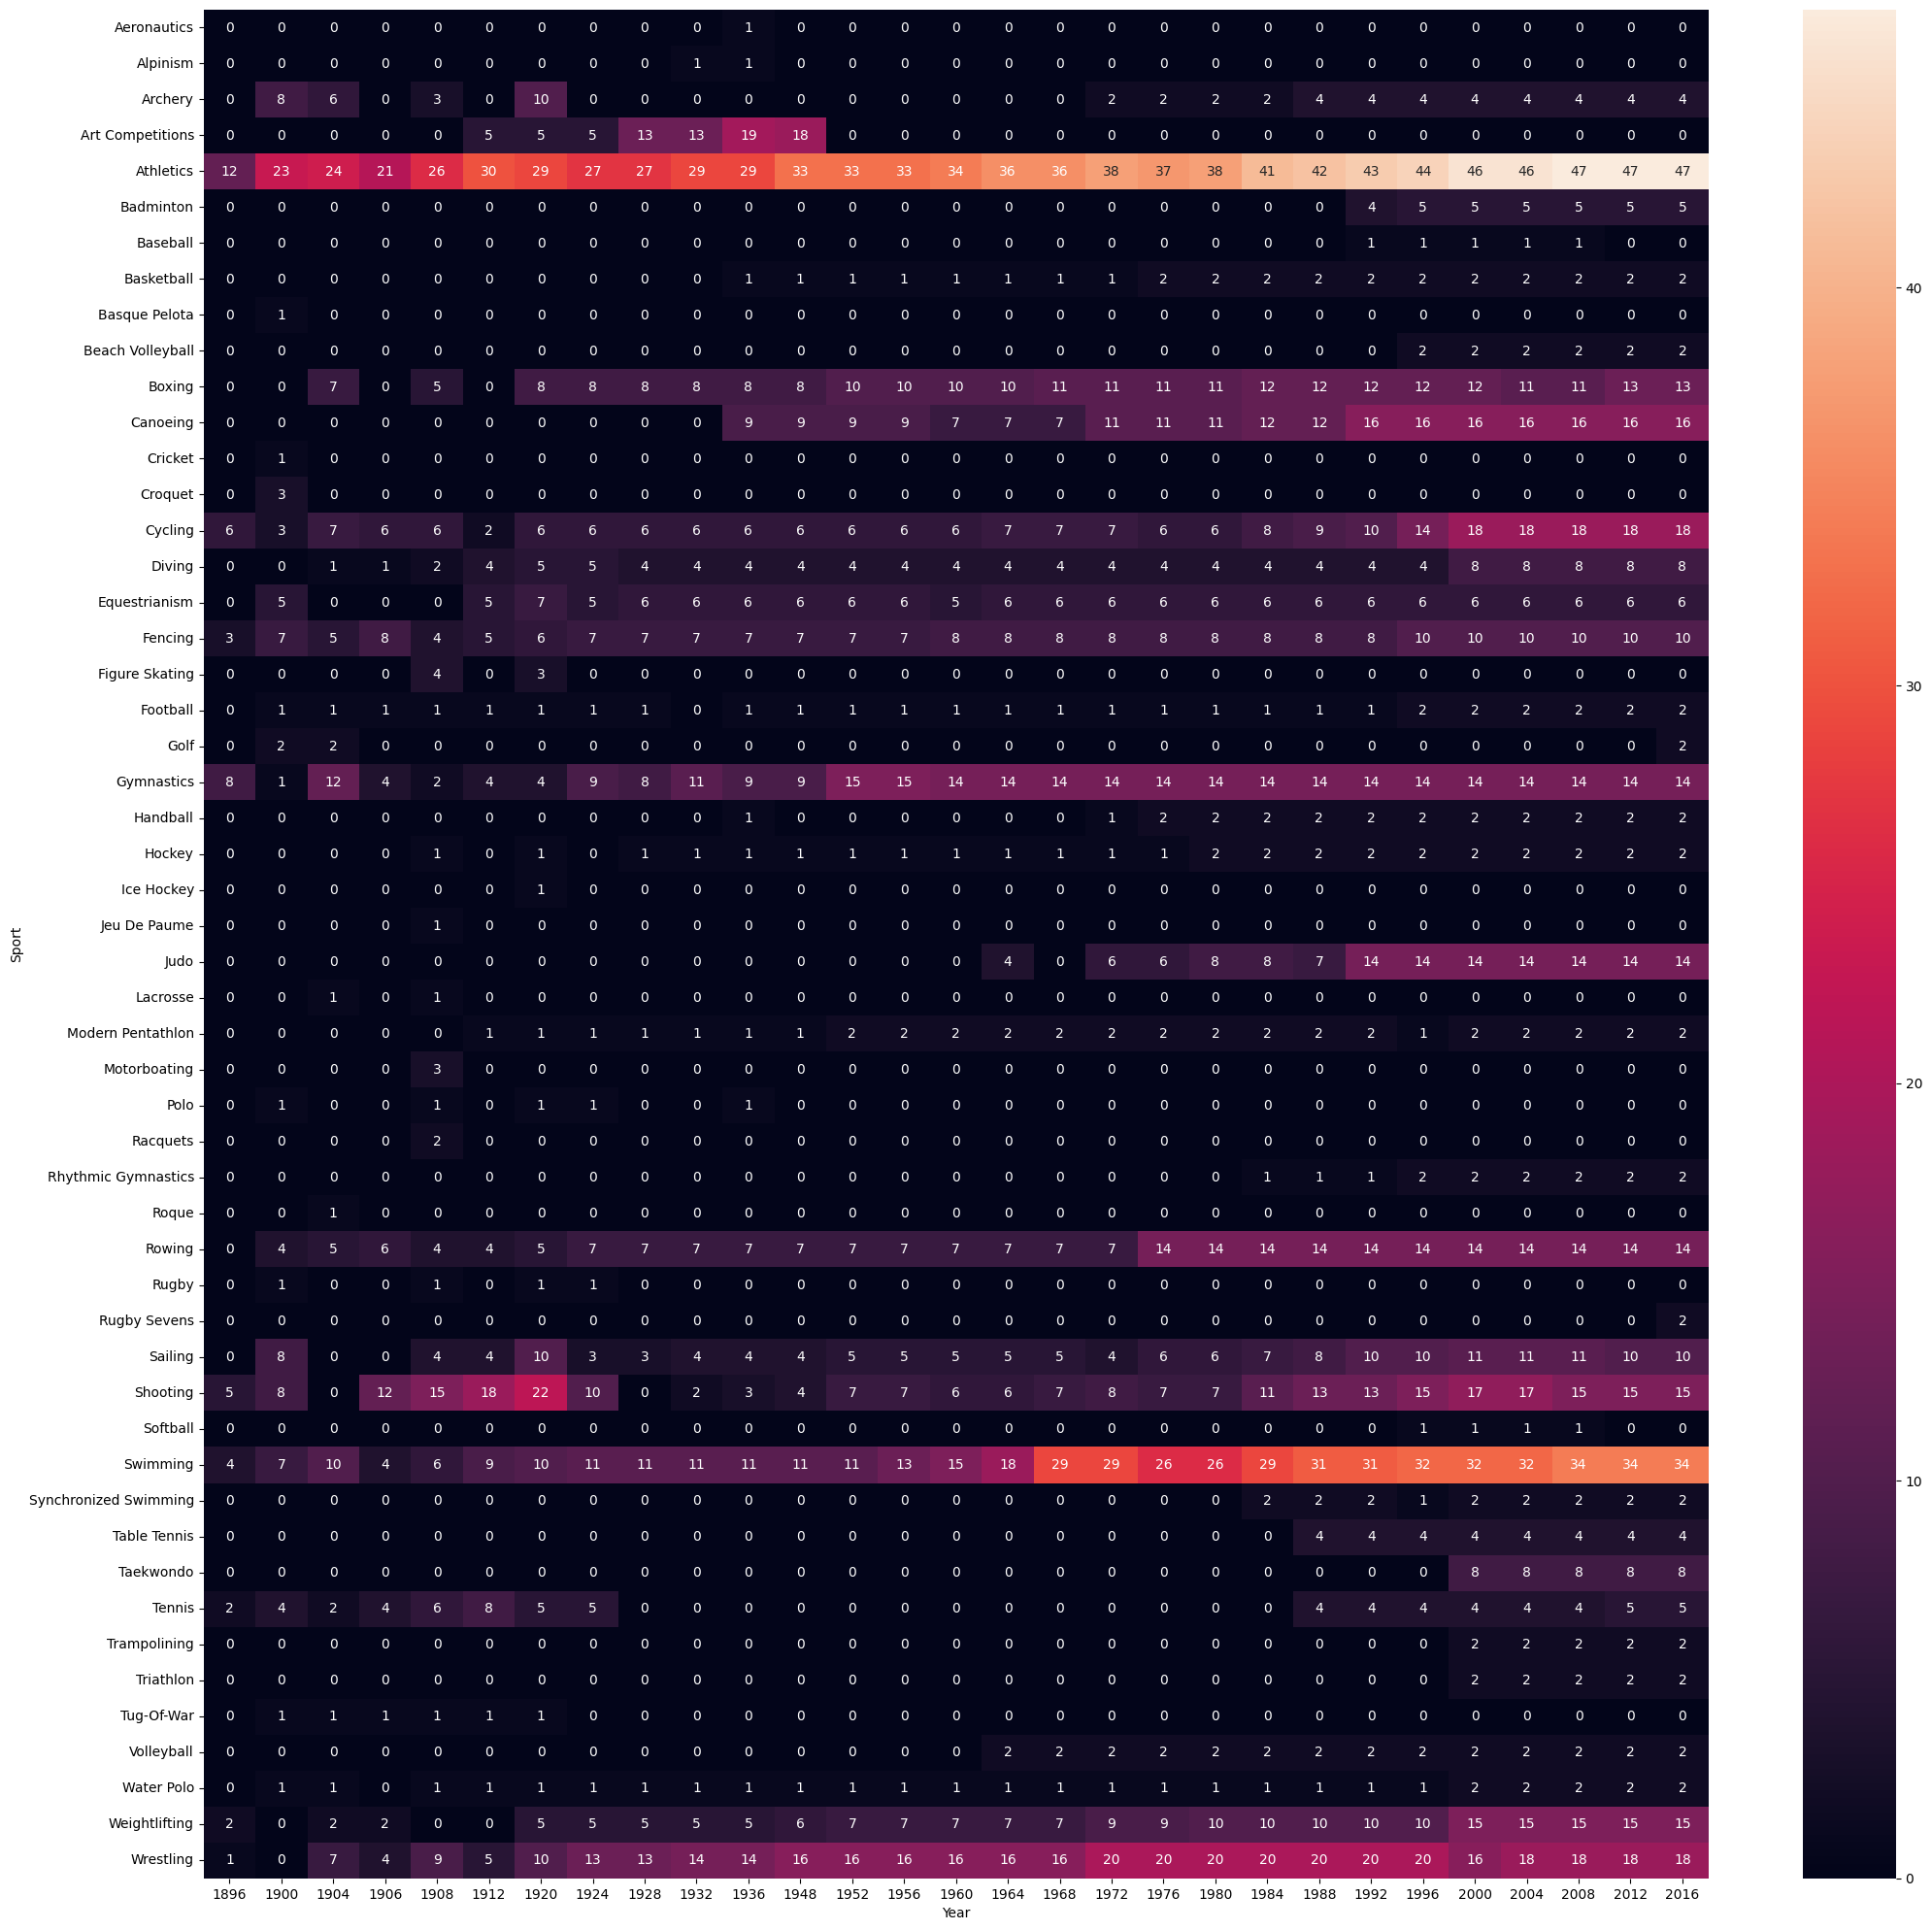

In [100]:
# No. of events in each sport per year
import seaborn as sns
import matplotlib.pyplot as plt

events_per_sports = df.drop_duplicates(['Year','Event'])
plt.figure(figsize=(25,25))
event_per_sports = pd.pivot_table(data=events_per_sports,columns='Year',index='Sport',values='Event',aggfunc='count').fillna(0).astype(int)
sns.heatmap(event_per_sports,annot=True)

In [101]:
# Most successful athletes (who achieved more medals)

In [102]:
df.groupby(['Name','Sport'])[['Gold','Bronze','Silver']].sum().sort_values(by='Gold',ascending=False).reset_index()

,Name,Sport,Gold,Bronze,Silver
0,"Michael Fred Phelps, II",Swimming,23,2,3
1,"Raymond Clarence ""Ray"" Ewry",Athletics,10,0,0
2,"Frederick Carlton ""Carl"" Lewis",Athletics,9,0,1
3,Larysa Semenivna Latynina (Diriy-),Gymnastics,9,4,5
4,Mark Andrew Spitz,Swimming,9,1,1
...,...,...,...,...,...
117267,Hartwig Bleidick,Football,0,0,0
117268,Hartwell F. Jordan,Sailing,0,0,0
117269,Hartmuth Behrens,Fencing,0,0,0
117270,Hartmut Wenzel,Rowing,0,1,0


### Country Wise Analysis
* Country wise medal tally per year
* Which sport each country is good at
* Most Successful Athletes(Top 10)

In [103]:
#country wise medal tally per year
cw_df = df.dropna(subset=['Medal'])
cw_df = cw_df.drop_duplicates(['Team',"NOC",'Games','Year','City','Sport',"Event","Medal"])

In [118]:

country_df = cw_df.groupby(["region",'Year'])['Medal'].count().reset_index()

px.line(country_df,x='Year',y='Medal',color='region')
# country_df/

<Axes: xlabel='Year', ylabel='Sport'>

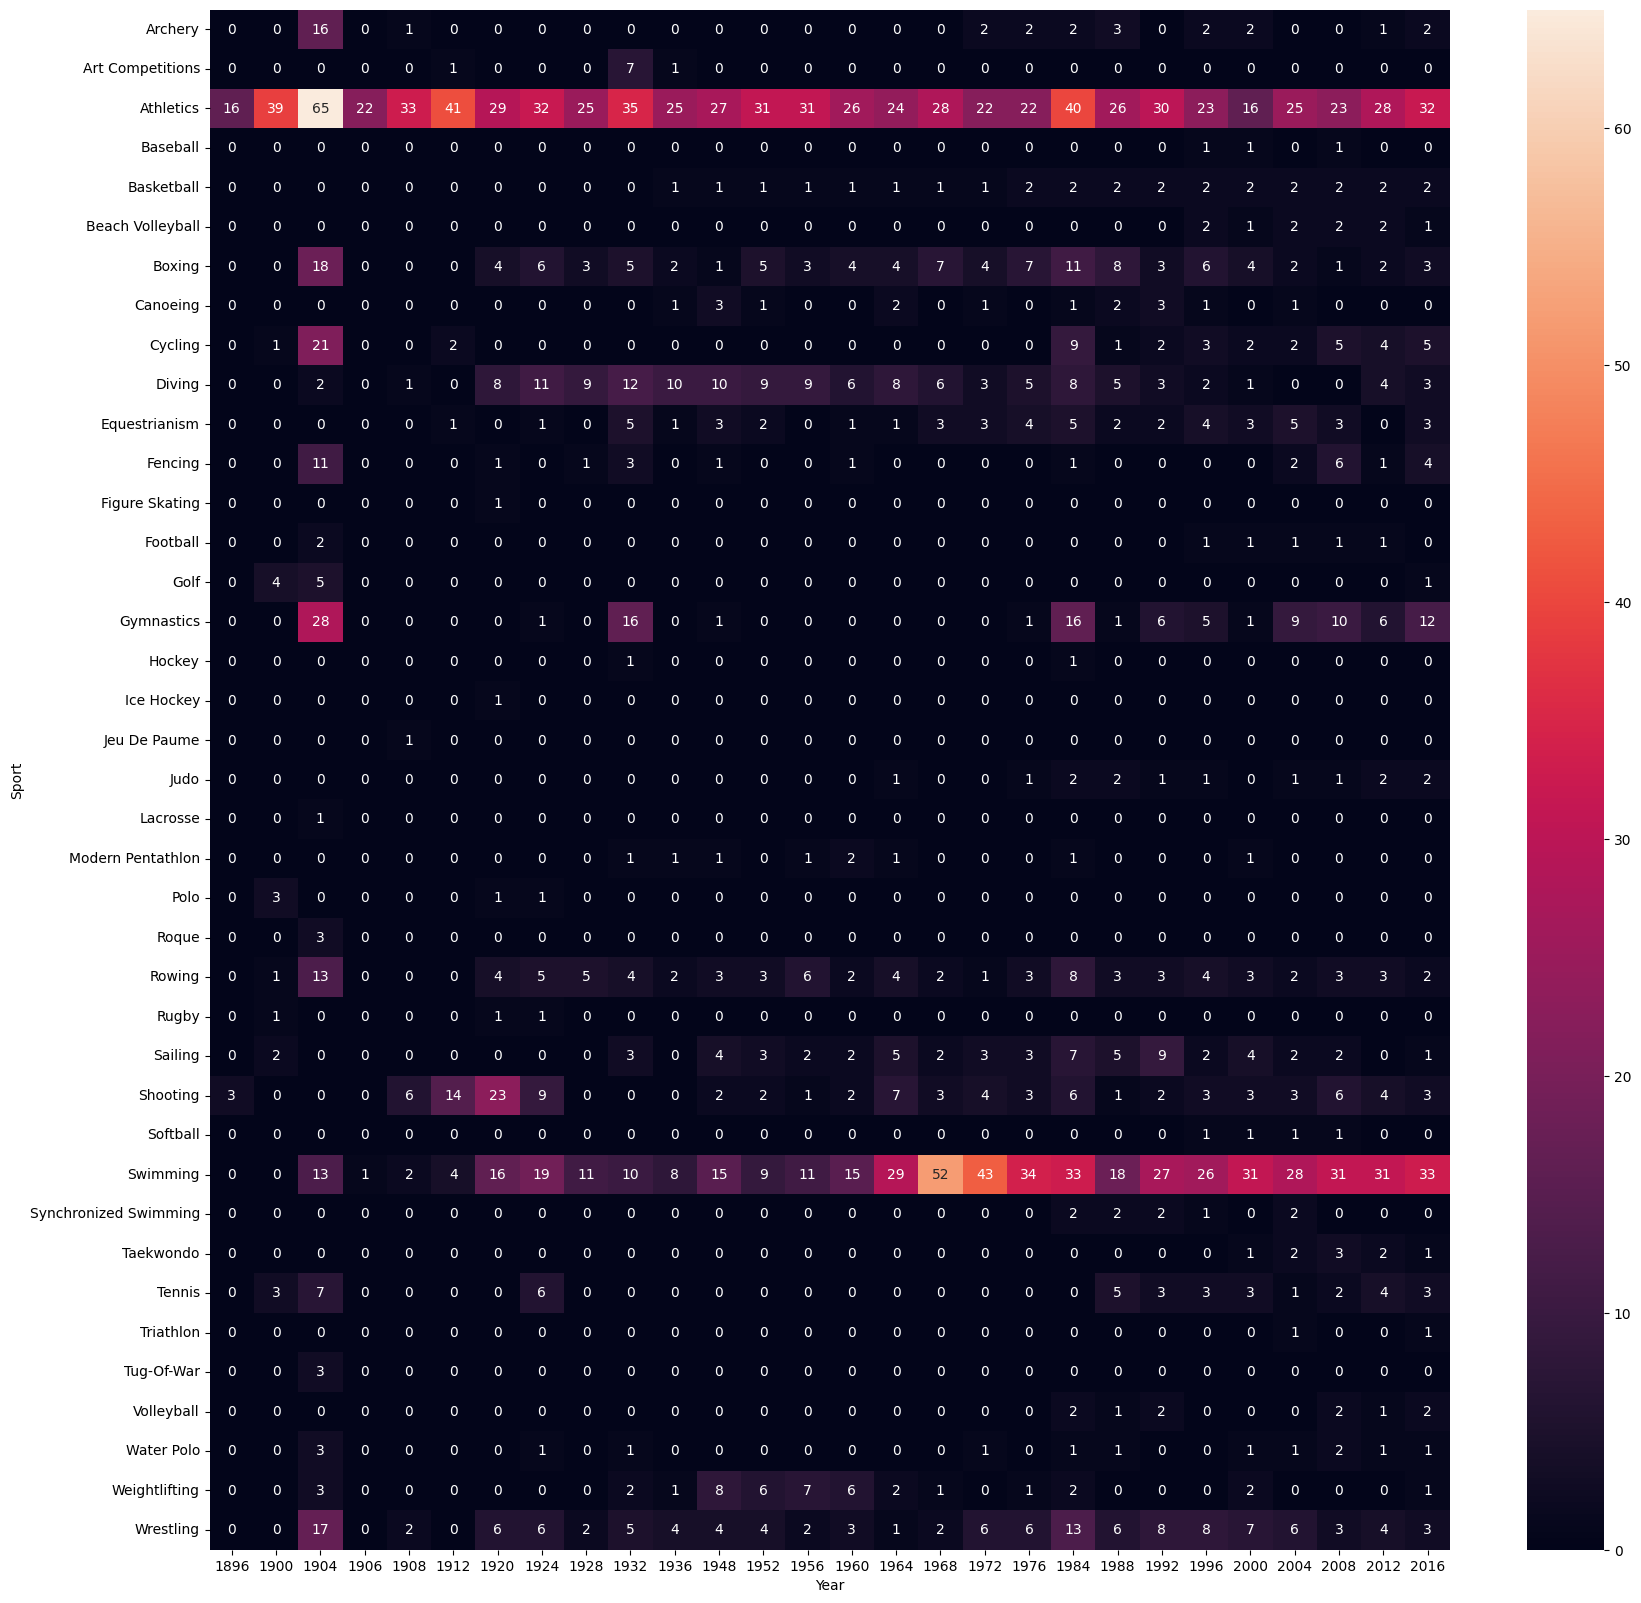

In [125]:
#Which sports each country is good at
plt.figure(figsize=(20,20))
country_df = cw_df[cw_df['region']=='USA']
country_df = pd.pivot_table(data=country_df,index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)
sns.heatmap(country_df,annot=True)

In [128]:
country = "USA"
country_df = df.dropna(subset=['Medal'])
country_df = country_df[country_df['region']==country]
result_df = country_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates()
result_df = result_df.rename(columns={'index':'Name','Name_x':'Medal_count'}).reset_index(drop=True)
result_df

,Name,Medal_count,Sport
0,"Michael Fred Phelps, II",28,Swimming
1,Ryan Steven Lochte,12,Swimming
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
3,Natalie Anne Coughlin (-Hall),12,Swimming
4,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
5,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
6,Carl Townsend Osburn,11,Shooting
7,Mark Andrew Spitz,11,Swimming
8,"Raymond Clarence ""Ray"" Ewry",10,Athletics
9,"Frederick Carlton ""Carl"" Lewis",10,Athletics


### Athletes wise analysis

In [135]:
# age distribution of medal won athletes 

import plotly.figure_factory as ff
athletes_df = df.drop_duplicates(subset=['Name','region'])

x1 = athletes_df['Age'].dropna()
x2 = athletes_df[athletes_df['Medal']=='Gold']['Age'].dropna()
x3 = athletes_df[athletes_df['Medal']=='Silver']['Age'].dropna()
x4 = athletes_df[athletes_df['Medal']=='Bronze']['Age'].dropna()

fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)

In [130]:
fig.show()

In [133]:
# age distribution of gold medal athletes in different sports
sports_df_list = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                 'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                 'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                 'Tennis', 'Golf', 'Softball', 'Archery',
                 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                 'Rhythmic Gymnastics', 'Rugby Sevens',
                 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athletes_df[athletes_df['Sport'] == sport]
    sports_df_list.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [134]:
fig = ff.create_distplot(sports_df_list, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)

<Axes: xlabel='Weight', ylabel='Height'>

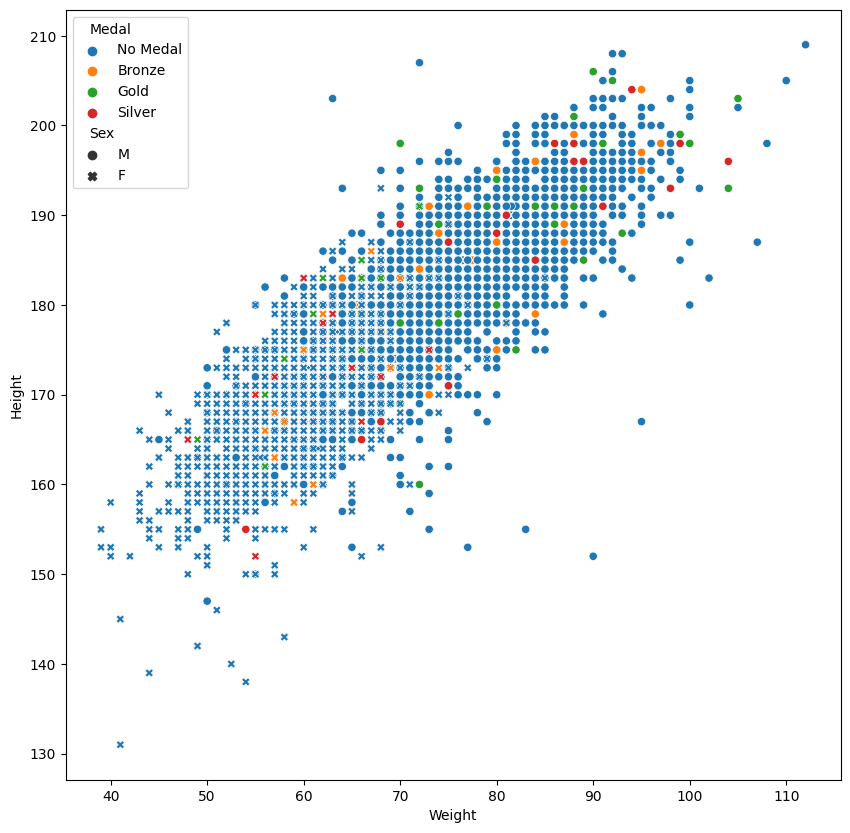

In [143]:
### height vs weight of athletes 
plt.figure(figsize=(10,10))
athletes_df['Medal'].fillna('No Medal',inplace=True)
sport_df = athletes_df[athletes_df['Sport']=='Swimming']

sns.scatterplot(x=sport_df['Weight'],y=sport_df['Height'],hue=sport_df['Medal'],style=sport_df['Sex'])

In [152]:
## Male vs Female over the years

men = athletes_df[athletes_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athletes_df[athletes_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

gender_df = men.merge(women,on='Year',how='left')
gender_df.rename(columns={'Name_x':'Male',"Name_y":'Female'},inplace=True)
gender_df.fillna(0,inplace=True)
fig = px.line(gender_df,x='Year',y=['Male','Female'])
fig.show()

In [150]:
gender_df

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0
